In [10]:
import pandas as pd
df = pd.read_csv("C:/Users/peska/Documents/uceni/2017_2018/NPRG065/cviceni/student-mat.csv", delimiter=";")
print(df.head())



  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [11]:
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [12]:
df.G3.head(20)

0      6
1      6
2     10
3     15
4     10
5     15
6     11
7      6
8     19
9     15
10     9
11    12
12    14
13    11
14    16
15    14
16    14
17    10
18     5
19    10
Name: G3, dtype: int64

In [13]:
df.groupby(by="sex").mean()

age      Medu      Fedu  traveltime  studytime  failures    famrel  \
sex                                                                             
F    16.730769  2.668269  2.485577    1.408654   2.278846  0.302885  3.894231   
M    16.657754  2.839572  2.561497    1.491979   1.764706  0.368984  4.000000   

     freetime     goout      Dalc      Walc    health  absences         G1  \
sex                                                                          
F    3.009615  3.028846  1.254808  1.956731  3.365385  6.216346  10.620192   
M    3.486631  3.197861  1.732620  2.663102  3.764706  5.144385  11.229947   

            G2         G3  
sex                        
F    10.389423   9.966346  
M    11.074866  10.914439

In [26]:
df.studytime.describe()

count    395.000000
mean       2.035443
std        0.839240
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

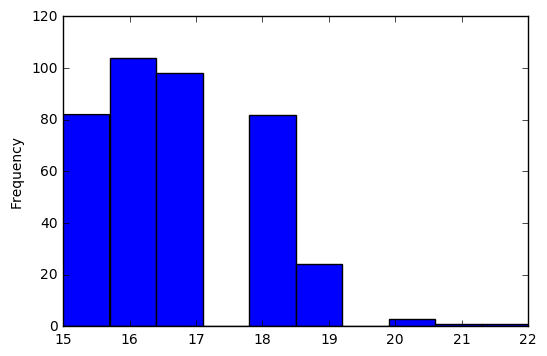

In [23]:
%matplotlib inline

#df.age.plot()
df.age.plot.hist()

In [38]:
import sklearn.linear_model as lm
import numpy as np
linReg = lm.LinearRegression()
collist = df.columns.tolist()


linReg.fit(df[['G1', 'G2']][100:], df.G3[100:]) #could not convert string to float
err = linReg.predict(df[['G1', 'G2']][0:100])

np.mean(np.abs(err-df.G3[0:100]))

0.9528808795698436

In [35]:
dummy_famsize = pd.get_dummies(df.famsize)
mergedDF = df.join(dummy_famsize)
mergedDF.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>school</th>
      <th>sex</th>
      <th>age</th>
      <th>address</th>
      <th>famsize</th>
      <th>Pstatus</th>
      <th>Medu</th>
      <th>Fedu</th>
      <th>Mjob</th>
      <th>Fjob</th>
      <th>...</th>
      <th>goout</th>
      <th>Dalc</th>
      <th>Walc</th>
      <th>health</th>
      <th>absences</th>
      <th>G1</th>
      <th>G2</th>
      <th>G3</th>
      <th>GT3</th>
      <th>LE3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>GP</td>
      <td>F</td>
      <td>18</td>
      <td>U</td>
      <td>GT3</td>
      <td>A</td>
      <td>4</td>
      <td>4</td>
      <td>at_home</td>
      <td>teacher</td>
      <td>...</td>
      <td>4</td>
      <td>1</td>
      <td>1</td>
      <td>3</td>
      <td>6</td>
      <td>5</td>
      <td>6</td>
      <td>6</td>
      <td>1.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>GP</td>
      <td>F</td>
      <td>17</td>
      <td>U</td>
      <td>GT3</td>
      <td>T</td>
      <td>1</td>
      <td>1</td>
      <td>at_home</td>
      <td>other</td>
      <td>...</td>
      <td>3</td>
      <td>1</td>
      <td>1</td>
      <td>3</td>
      <td>4</td>
      <td>5</td>
      <td>5</td>
      <td>6</td>
      <td>1.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>GP</td>
      <td>F</td>
      <td>15</td>
      <td>U</td>
      <td>LE3</td>
      <td>T</td>
      <td>1</td>
      <td>1</td>
      <td>at_home</td>
      <td>other</td>
      <td>...</td>
      <td>2</td>
      <td>2</td>
      <td>3</td>
      <td>3</td>
      <td>10</td>
      <td>7</td>
      <td>8</td>
      <td>10</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>GP</td>
      <td>F</td>
      <td>15</td>
      <td>U</td>
      <td>GT3</td>
      <td>T</td>
      <td>4</td>
      <td>2</td>
      <td>health</td>
      <td>services</td>
      <td>...</td>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>5</td>
      <td>2</td>
      <td>15</td>
      <td>14</td>
      <td>15</td>
      <td>1.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>GP</td>
      <td>F</td>
      <td>16</td>
      <td>U</td>
      <td>GT3</td>
      <td>T</td>
      <td>3</td>
      <td>3</td>
      <td>other</td>
      <td>other</td>
      <td>...</td>
      <td>2</td>
      <td>1</td>
      <td>2</td>
      <td>5</td>
      <td>4</td>
      <td>6</td>
      <td>10</td>
      <td>10</td>
      <td>1.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 35 columns</p>
</div>

In [ ]:

linReg.fit(mergedDF[['G1', 'G2', 'GT3','LE3']][100:], mergedDF.G3[100:]) 
err = linReg.predict(mergedDF[['G1', 'G2', 'GT3','LE3']][0:100])

np.mean(np.abs(err-mergedDF.G3[0:100]))

1.139200262260083